# High expression
Create a heatmap of mean expression for highly ranked genes for different annotations

In [6]:
import scanpy as sc
import matplotlib.pyplot as plt
import sclitr as sl
import math
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import math
import anndata as ad

In [7]:
# Set font globally
plt.rcParams.update({
    'font.family': 'serif', # Font family
    'font.serif': ['Arial'], # Specific font
})

In [ ]:
DATA_PATH = "/placodes/data"

In [9]:
adata = sc.read_h5ad(f"{DATA_PATH}/anndatas/cranial_placodal_reannotated.h5ad")

In [10]:
# Rename epibranchial derived neurons
adata.obs.loc[adata.obs['new_annotation'] == 'Epibranchial-derived neurons', 'new_annotation'] = 'Epibranchial neurons'

In [14]:
# Combine CNS to only Forebrain, Midbrain, and Hindbrain  
# Forebrain
adata.obs.loc[adata.obs['new_annotation'] == 'Forebrain, TelA', 'new_annotation'] = 'Forebrain'
adata.obs.loc[adata.obs['new_annotation'] == 'Forebrain, peduncular hypothalmus', 'new_annotation'] = 'Forebrain'
adata.obs.loc[adata.obs['new_annotation'] == 'Forebrain, terminal hypothalmus', 'new_annotation'] = 'Forebrain'
adata.obs.loc[adata.obs['new_annotation'] == 'Forebrain, terminal hypothalmus', 'new_annotation'] = 'Forebrain'

# Hindbrain
adata.obs.loc[adata.obs['new_annotation'] == 'Medullary hindbrain', 'new_annotation'] = 'Hindbrain'
adata.obs.loc[adata.obs['new_annotation'] == 'Hindbrain floor', 'new_annotation'] = 'Hindbrain'

# Midbrain
adata.obs.loc[adata.obs['new_annotation'] == 'Diencephalon', 'new_annotation'] = 'Midbrain'

# Midbrain
adata.obs.loc[adata.obs['new_annotation'] == 'Diencephalon', 'new_annotation'] = 'Midbrain'

In [15]:
# Rename olfactory 
adata.obs.loc[adata.obs['new_annotation'] == 'Vomeronasal epithelium', 'new_annotation'] = 'Olfactory epithelium'
adata.obs.loc[adata.obs['new_annotation'] == 'Pioneer olfactory neruons', 'new_annotation'] = 'Olfactory neurons'


In [ ]:
# Combine skin
adata.obs.loc[adata.obs['new_annotation'] == 'Primary palate epithelium', 'new_annotation'] = 'Epidermis'
adata.obs.loc[adata.obs['new_annotation'] == 'Frontnasal process epithelium', 'new_annotation'] = 'Epidermis'


In [17]:
# Combine otic 
adata.obs['new_annotation'] = adata.obs['new_annotation'].cat.add_categories('Otic')

adata.obs.loc[adata.obs['new_annotation'] == 'Vestibular ganglia neurons', 'new_annotation'] = 'Otic'
adata.obs.loc[adata.obs['new_annotation'] == 'Vestibular and spiral ganglia neurons', 'new_annotation'] = 'Otic'
adata.obs.loc[adata.obs['new_annotation'] == 'Otic vesicle epithlium', 'new_annotation'] = 'Otic'


In [18]:
# Combine epibranchial
adata.obs['new_annotation'] = adata.obs['new_annotation'].cat.add_categories('Epibranchial')

adata.obs.loc[adata.obs['new_annotation'] == 'Epibranchial neurons', 'new_annotation'] = 'Epibranchial'
adata.obs.loc[adata.obs['new_annotation'] == 'Epibranchial epithelium', 'new_annotation'] = 'Epibranchial'


In [19]:
# Combine Olfactory
adata.obs['new_annotation'] = adata.obs['new_annotation'].cat.add_categories('Olfactory')

adata.obs.loc[adata.obs['new_annotation'] == 'Olfactory neurons', 'new_annotation'] = 'Olfactory'
adata.obs.loc[adata.obs['new_annotation'] == 'Olfactory epithelium', 'new_annotation'] = 'Olfactory'


In [20]:
# Combine eye
adata.obs['new_annotation'] = adata.obs['new_annotation'].cat.add_categories('Eye (Retina + RPE)')

adata.obs.loc[adata.obs['new_annotation'] == 'Optic cup neuroectoderm', 'new_annotation'] = 'Eye (Retina + RPE)'
adata.obs.loc[adata.obs['new_annotation'] == 'Retinal mitotic progenitors', 'new_annotation'] = 'Eye (Retina + RPE)'
adata.obs.loc[adata.obs['new_annotation'] == 'Retina pigmented epithelium', 'new_annotation'] = 'Eye (Retina + RPE)'
adata.obs.loc[adata.obs['new_annotation'] == 'Retina', 'new_annotation'] = 'Eye (Retina + RPE)'



In [21]:
# Keep mesenchyme but rename Unknown mesenchyme to just mesenchyme
adata.obs.loc[adata.obs['new_annotation'] == 'Unknown mesenchyme', 'new_annotation'] = 'Mesenchyme'

In [ ]:
# Figure out what to do with Glial cells
glial_cells= adata[adata.obs["new_annotation"] == "Glial cells"]

In [23]:
id_= 0
for name in glial_cells.obs_names:
    adata.obs[f"Glial Cells {id_}"] = adata.obs_names==name
    id_+=1

In [24]:
glial_cells = ["SCP",
               "Boundary cap",
               "Satellite Glia",
               "NC-deried eye melanocyte"
              ]

In [25]:
adata.obs["SCPs"] = adata.obs["new_annotation"] == "SCP"
adata.obs["Boundary caps"] = adata.obs["new_annotation"] == "Boundary cap"
adata.obs["Satellite Glias"] = adata.obs["new_annotation"] == "Satellite Glia"
adata.obs["NC-derived eye melanocytes"] = adata.obs["new_annotation"] == "NC-derived eye melanocyte"
adata.obs["Sensory neural progenitors"] = adata.obs["new_annotation"] == "Sensory neural progenitors"


In [26]:
adata.obs['SCPs'] = adata.obs['SCPs'].replace(False, np.nan)
adata.obs['Boundary caps'] = adata.obs['Boundary caps'].replace(False, np.nan)
adata.obs['Satellite Glias'] = adata.obs['Satellite Glias'].replace(False, np.nan)
adata.obs['NC-derived eye melanocytes'] = adata.obs['NC-derived eye melanocytes'].replace(False, np.nan)
adata.obs['Sensory neural progenitors'] = adata.obs['Sensory neural progenitors'].replace(False, np.nan)


In [27]:
fix_glia_dict = {"112623_E11_Otic:TCCTGCAGTGGACCTC":"SCP",
                 "lens3:AACCTGAAGGGACCAT":"Sensory neural progenitors",
                 'otic1:ATGATCGAGGGCGAGA':"SCP",
                 'otic2:CTACTATCAATAACGA':"SCP",
                 '112623_E11_cranial1:GCGGAAAGTCGATTAC':"Boundary cap",
                 '112623_E11_cranial2:TTAGTCTAGGCCCACT':"Satellite Glia",
}

In [28]:
for key_ in fix_glia_dict:
    adata.obs.loc[adata.obs_names == key_, 'new_annotation'] = fix_glia_dict[key_]
adata = adata[adata.obs.new_annotation != "Glial cells"] 


In [29]:
annotations = list(set(adata.obs.new_annotation))

In [30]:
annotations

['Midbrain',
 'Trigeminal ganglia neurons',
 'Satellite Glia',
 'Sensory neural progenitors',
 'Lens',
 'Hindbrain',
 'Olfactory',
 'Eye (Retina + RPE)',
 'Adenohypophyseal cells',
 'Mesenchyme',
 'Forebrain',
 'Epidermis',
 'Otic',
 'SCP',
 'Epibranchial',
 'CNS Inmature neurons',
 'NC-derived eye melanocyte',
 'Immune cells',
 'Boundary cap']

In [ ]:
# This gives you the actual expression values rather than differential expression
mean_expr = pd.DataFrame(
    adata.X.toarray() if hasattr(adata.X, 'toarray') else adata.X,
    columns=adata.var_names,
    index=adata.obs_names
)
mean_expr['group'] = adata.obs["new_annotation"].values

# Get mean expression for each gene in each group
mean_per_group = mean_expr.groupby('group').mean()

# Get top N genes per group
n_top = 3
top_genes_per_group = {}
for group in mean_per_group.index:
    top_genes = mean_per_group.loc[group].sort_values(ascending=False).head(n_top)
    top_genes_per_group[group] = top_genes

# Display results
#for group, genes in top_genes_per_group.items():
#    print(f"\nTop {n_top} genes in {group}:")
#    print(genes)

# Create heatmap df for top genes per group
genes = []
for group in top_genes_per_group:
    for gene in top_genes_per_group[group].index.tolist():
        genes.append(gene)
to_df={}
for gene in genes:
    tmp_={}
    for group in top_genes_per_group:
        tmp_[group] = mean_per_group[gene][group]
    to_df[gene] = tmp_

/tmp/ipykernel_3438178/1829673460.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_per_group = mean_expr.groupby('group').mean()


In [32]:
df = pd.DataFrame(to_df)

In [33]:
df = df.T

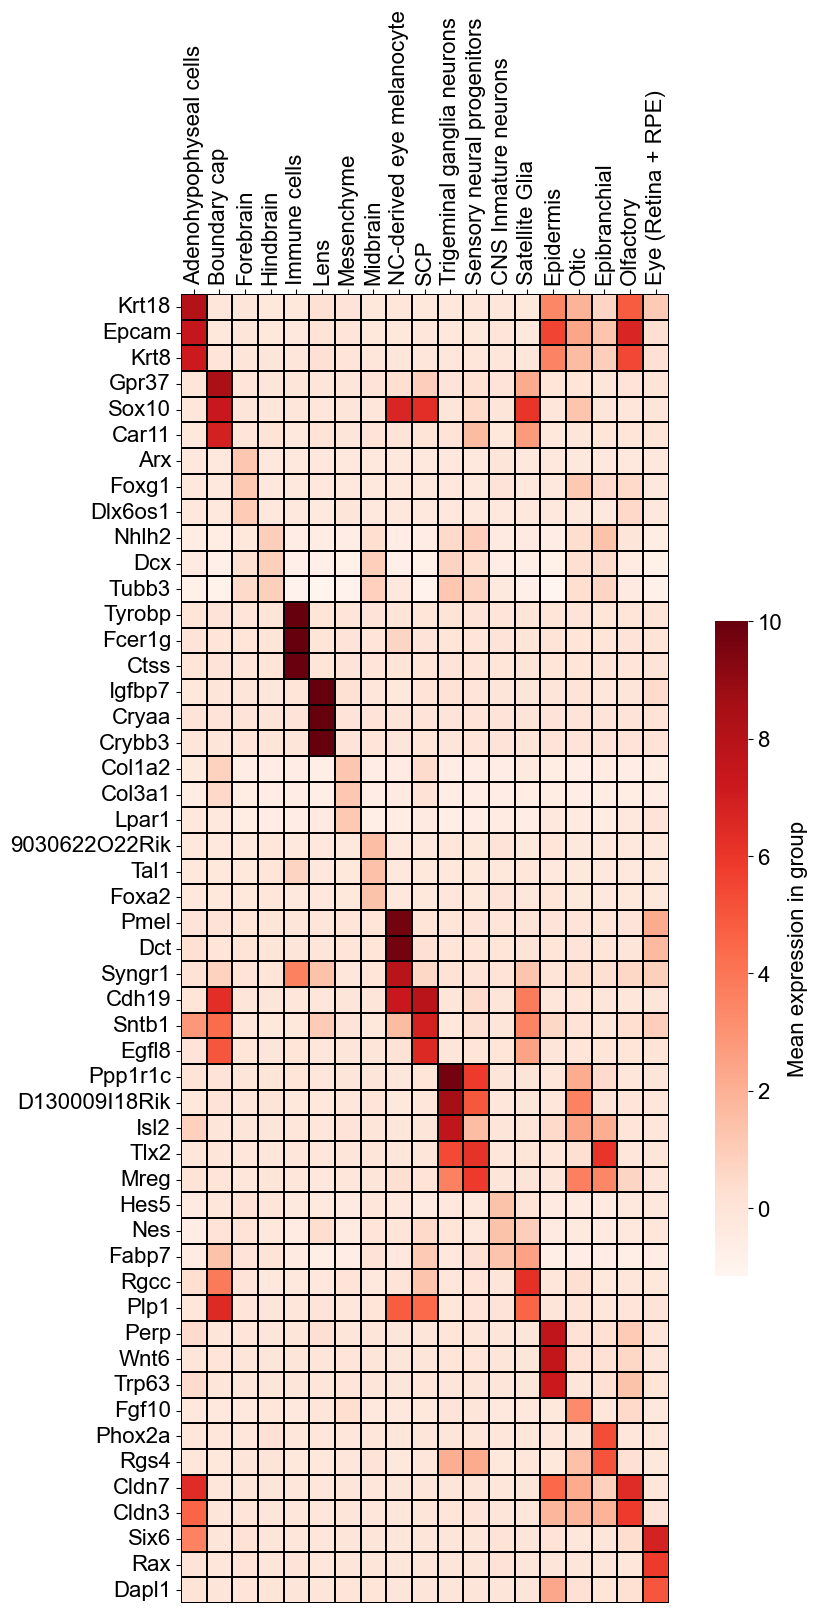

In [34]:
# Increase default font sizes
plt.rcParams.update({
        'font.size': 7,
        'axes.labelsize': 10,
        'axes.titlesize': 10,
        'xtick.labelsize': 16,
        'ytick.labelsize': 16
    })

fig, axes = plt.subplots(figsize=(12,17))

sns.heatmap(df,
            linewidths=0.01,
            linecolor='black',
            ax=axes,
            square=True,
            cbar_kws={'orientation': 'vertical', # Swtich if we transpose to horizontal/vertial
                      'location': 'right', # Swtich if we transpose to bottom/right
                      'label':'Mean expression in group',
                      "shrink":0.5
                  },
            cmap="Reds"
           )

# Adjust layout to prevent label cutoff
#plt.tight_layout()

cbar = axes.collections[0].colorbar  # Get the colorbar
cbar.set_label('Mean expression in group', size=16)  # Set label and size

axes.xaxis.tick_top()
plt.xticks(rotation=90)



# Save fig
plt.savefig("figures/highest_mean_expression_group.svg", dpi=300, transparent=True)


plt.show()